# WeatherPy



In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

In [13]:
cities_df = pd.DataFrame({"City":cities}) 
cities_df.tail()

,City
602,homer
603,alexander city
604,sangar
605,turukhansk
606,marsh harbour


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
city_name = []
cloudiness = []
country = []
date =[]
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

#Start Data Retrieval

print("Starting Data Retrieval")
city_count = 0
for city in cities:
    query_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city
    response = requests.get(query_url).json()
    #print(response)
    if (response["cod"] == "404"):
        print("City not found, skipping...")
    else:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]["temp_max"]) 
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"]) 
        print("Processing: City # " , city_count, ' : ' , response["name"], response["sys"]["country"])
        
        city_count += 1
print("---\nData Retrieval Complete\n---")


Starting Data Retrieval
Processing: City #  0  :  Yulara AU
Processing: City #  1  :  Thompson CA
Processing: City #  2  :  Minbu MM
Processing: City #  3  :  Cidreira BR
Processing: City #  4  :  Kempsey AU
Processing: City #  5  :  Dharchula IN
Processing: City #  6  :  Lavrentiya RU
Processing: City #  7  :  Labuhan ID
Processing: City #  8  :  Atuona PF
Processing: City #  9  :  Barrow AR
Processing: City #  10  :  Avarua CK
City not found, skipping...
Processing: City #  11  :  New Norfolk AU
Processing: City #  12  :  Tymovskoye RU
Processing: City #  13  :  Qaanaaq GL
Processing: City #  14  :  Busselton AU
Processing: City #  15  :  Vaini IN
Processing: City #  16  :  Port Elizabeth US
Processing: City #  17  :  Boyolangu ID
Processing: City #  18  :  Kaihua CN
Processing: City #  19  :  Naryan-Mar RU
Processing: City #  20  :  Jiuquan CN
Processing: City #  21  :  Baker City US
Processing: City #  22  :  Axim GH
Processing: City #  23  :  Jamestown AU
Processing: City #  24  :

Processing: City #  194  :  Creston US
Processing: City #  195  :  Geraldton CA
Processing: City #  196  :  Arecibo PR
Processing: City #  197  :  Bethel US
City not found, skipping...
Processing: City #  198  :  Vila Velha BR
Processing: City #  199  :  Kachiry KZ
Processing: City #  200  :  Greystones IE
Processing: City #  201  :  Fort Nelson CA
Processing: City #  202  :  Bambous Virieux MU
Processing: City #  203  :  Bilma NE
Processing: City #  204  :  Eureka US
City not found, skipping...
City not found, skipping...
Processing: City #  205  :  Vila Franca do Campo PT
Processing: City #  206  :  Svit SK
Processing: City #  207  :  Tuzla BA
City not found, skipping...
Processing: City #  208  :  Tautira PF
Processing: City #  209  :  Vardo US
Processing: City #  210  :  Luderitz NA
Processing: City #  211  :  Porto Walter BR
Processing: City #  212  :  Acajutla SV
Processing: City #  213  :  Manzanillo MX
Processing: City #  214  :  Jinchang CN
Processing: City #  215  :  Kabo CF


Processing: City #  381  :  Slantsy RU
City not found, skipping...
Processing: City #  382  :  Raudeberg NO
Processing: City #  383  :  Zeya RU
Processing: City #  384  :  Keti Bandar PK
Processing: City #  385  :  Saint-Georges CA
Processing: City #  386  :  Prince Rupert CA
Processing: City #  387  :  Maceio BR
Processing: City #  388  :  Ribeira Grande PT
Processing: City #  389  :  Iquique CL
Processing: City #  390  :  Broome GB
Processing: City #  391  :  Corinto CO
City not found, skipping...
Processing: City #  392  :  Alyangula AU
Processing: City #  393  :  Hobbs US
Processing: City #  394  :  Constitucion MX
Processing: City #  395  :  Cap-Chat CA
Processing: City #  396  :  Pisco PE
Processing: City #  397  :  Nanhai CN
Processing: City #  398  :  Syasstroy RU
Processing: City #  399  :  Chuy UY
Processing: City #  400  :  Nikolayevsk-na-amure RU
Processing: City #  401  :  Voznesenye RU
Processing: City #  402  :  Kuito AO
Processing: City #  403  :  Ler NO
Processing: Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City": city_name,
    "Country": country,
    "Cloudiness":cloudiness, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.count()

City          547
Country       547
Cloudiness    547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [23]:
# output data to csv
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yulara,AU,0,29,-25.24,130.99,62.60,12.75
1,Thompson,CA,20,48,55.74,-97.86,64.40,2.24
2,Minbu,MM,100,68,20.18,94.88,86.63,1.66
3,Cidreira,BR,0,84,-30.17,-50.22,61.97,11.79
4,Kempsey,AU,0,36,-31.08,152.84,75.00,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

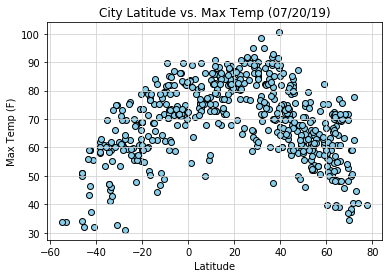

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temp (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

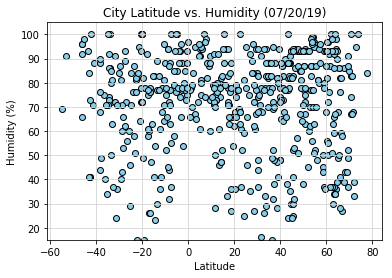

In [29]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

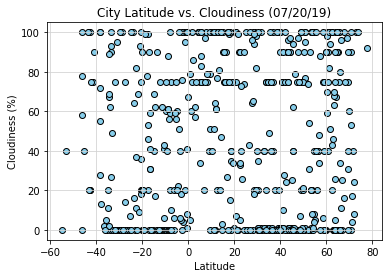

In [31]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

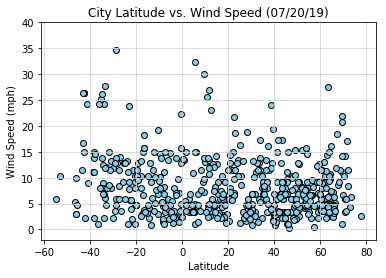

In [34]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,40)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsWind.png")
plt.show()

# Analysis

* As expected, there is a clear correlation between latitude and temperature: the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* Humidity does not seem to have a correlation to latitude.
* Similar, there is no real correlation between cloudiness and wind spped with latitude. 